In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import glob
import statsmodels.api as sm
import itertools
%matplotlib inline

In [56]:
ls

Project_Proposal              WB-Health.xlsx
Project_Proposal.md           WB-Housing.xlsx
TorontoThroughData.key        WB-Recreation.xlsx
WB-Civics.xlsx                WB-Safety.xlsx
WB-Culture.xlsx               WB-Transportation.xlsx
WB-Economics.xlsx.crdownload  wellbeing_toronto.ipynb
WB-Environment.xlsx


In [57]:
spreadsheet_params = {
    'WB-Housing.xlsx': {'sheetname': 'RawDataRef_2011'},
    'WB-Civics.xlsx': {'sheetname': 'RawData-Ref Period 2011', 'skiprows': 1},
    'WB-Culture.xlsx': {'sheetname': 'RawData-Ref Period 2011', 'skiprows': 1},
    'WB-Environment.xlsx': {'sheetname': 'RawData-Ref Period 2011'},
    'WB-Health.xlsx': {'sheetname': 'RawData-Ref Period 2011', 'skiprows': 1},
    'WB-Recreation.xlsx': {'sheetname': 'RawData-Ref Period 2011', 'skiprows': 1},
    'WB-Safety.xlsx': {'sheetname': 'RawData-Ref Period 2011', 'skiprows': 1},
    'WB-Transportation.xlsx': {'sheetname': 'RawData-Ref Period 2011'},
}

dfs = []
for name, params in spreadsheet_params.items():
    sheet_df = pd.read_excel(name, index_col='Neighbourhood', **params)
    sheet_df.drop('Neighbourhood Id', axis=1, inplace=True)
    dfs.append(sheet_df)
df = pd.concat(dfs, axis=1)
df.drop('TTC Overcrowded Routes', axis=1, inplace=True)

In [58]:
df.describe().T

count          mean           std  \
Home Prices                              140.0  5.481934e+05  2.676674e+05   
Mid-Century Highrise Households          140.0  1.807179e+03  1.716867e+03   
Mid-Century Highrise Population          140.0  3.909400e+03  3.866637e+03   
Percent Mid-Century Highrise Households  140.0  2.305857e+01  1.757903e+01   
Percent Mid-Century Highrise Population  140.0  2.012429e+01  1.699047e+01   
Rent Bank Applicants                     140.0  1.166429e+01  1.141223e+01   
Social Housing Turnover                  140.0  2.851463e+00  3.190548e+00   
Social Housing Units                     140.0  6.579500e+02  7.197533e+02   
Social Housing Waiting List              140.0  4.103000e+02  3.141644e+02   
City Grants Funding $                    140.0  9.918899e+04  3.458951e+05   
Neighbourhood Equity Score               140.0  5.778900e+01  1.688679e+01   
Salvation Army Donors                    140.0  6.121071e+02  4.462773e+02   
Walk Score                               140.0  7.227143e+01  1.279042e+01   
Watermain Breaks                         140.0  7.907143e+00  7.526353e+00   
Linguistic Diversity Index               140.0  6.548871e-01  1.460946e-01   
Green Rebate Programs                    140.0  2.059429e+02  1.504469e+02   
Green Spaces                             140.0  5.813882e-01  1.288385e+00   
Pollutant Carcinogenic TEP Score         140.0  3.783697e+03  2.156935e+04   
Pollutant Non-Carcinogenic TEP Score     140.0  1.606667e+06  6.423130e+06   
Pollutants Released to Air               140.0  5.894402e+04  1.840073e+05   
Tree Cover                               140.0  1.281438e+06  1.343461e+06   
Breast Cancer Screenings                 140.0  6.101500e+01  5.083831e+00   
Cervical Cancer Screenings               140.0  6.472086e+01  4.779294e+00   
DineSafe Inspections                     140.0  1.035714e+01  1.626094e+01   
Female Fertility                         140.0  4.454671e+01  1.079688e+01   
Health Providers                         140.0  3.605714e+01  3.584153e+01   
Premature Mortality                      140.0  2.170057e+02  6.822893e+01   
Student Nutrition                        140.0  9.482786e+02  1.197719e+03   
PFR Community Space Use                  140.0  5.744571e+02  9.075745e+02   
PFR Permits Issued                       140.0  2.278050e+03  2.303278e+03   
PFR Program Free Registrations           140.0  4.554000e+02  1.095762e+03   
PFR Program Registrations                140.0  2.756607e+03  2.938582e+03   
TCHC Facility Amenities                  140.0  3.878571e+00  5.101090e+00   
Arsons                                   140.0  1.114286e+00  1.269939e+00   
Assaults                                 140.0  1.506214e+02  1.215384e+02   
Break & Enters                           140.0  7.525000e+01  4.215595e+01   
Drug Arrests                             140.0  3.654286e+01  3.996498e+01   
Fire Medical Calls                       140.0  6.322000e+02  4.041207e+02   
Fire Vehicle Incidents                   140.0  8.820000e+01  7.621932e+01   
Fires & Fire Alarms                      140.0  2.403286e+02  1.985767e+02   
Hazardous Incidents                      140.0  1.082286e+02  5.502234e+01   
Murders                                  140.0  3.500000e-01  6.224227e-01   
Robberies                                140.0  3.444286e+01  2.635215e+01   
Sexual Assaults                          140.0  1.762143e+01  1.464126e+01   
Thefts                                   140.0  6.478571e+00  6.748800e+00   
Total Major Crime Incidents              140.0  3.511286e+02  2.359570e+02   
Vehicle Thefts                           140.0  2.982143e+01  3.402903e+01   
TTC Stops                                140.0  7.120714e+01  4.867651e+01   
Pedestrian/Other Collisions              140.0  1.745571e+02  1.708975e+02   
Traffic Collisions                       140.0  1.739929e+02  1.237593e+02   
Road Kilometres                          140.0  3.748139e+01  2

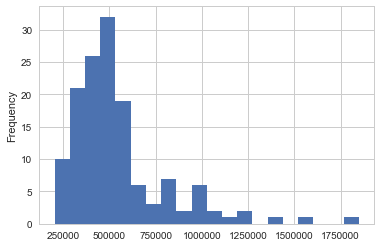

In [59]:
df['Home Prices'].plot.hist(bins=20)

In [60]:
# df['Price Category'] = pd.qcut(df['Home Prices'], 3, labels=['low', 'medium', 'high'])

In [61]:
feature_cols = df.columns.values

In [62]:
# df_norm = (df.iloc[:-1] - df.iloc[:-1].mean())/df.iloc[:-1].std()
df_norm = (df - df.mean())/df.std()
df_norm['Price Category'] = pd.qcut(df_norm['Home Prices'], 3, labels=['low', 'medium', 'high'])

In [63]:
df_norm.head()

Home Prices  \
Neighbourhood                                    
West Humber-Clairville               -0.861836   
Mount Olive-Silverstone-Jamestown    -1.109864   
Thistletown-Beaumond Heights         -0.500537   
Rexdale-Kipling                      -0.582523   
Elms-Old Rexdale                     -1.174448   

                                   Mid-Century Highrise Households  \
Neighbourhood                                                        
West Humber-Clairville                                   -0.650708   
Mount Olive-Silverstone-Jamestown                         1.341293   
Thistletown-Beaumond Heights                             -0.802146   
Rexdale-Kipling                                          -0.703129   
Elms-Old Rexdale                                         -0.545866   

                                   Mid-Century Highrise Population  \
Neighbourhood                                                        
West Humber-Clairville                                   -0.542952   
Mount Olive-Silverstone-Jamestown                         2.453191   
Thistletown-Beaumond Heights                             -0.685195   
Rexdale-Kipling                                          -0.739506   
Elms-Old Rexdale                                         -0.414934   

                                   Percent Mid-Century Highrise Households  \
Neighbourhood                                                                
West Humber-Clairville                                           -0.924885   
Mount Olive-Silverstone-Jamestown                                 1.128699   
Thistletown-Beaumond Heights                                     -0.549437   
Rexdale-Kipling                                                  -0.447042   
Elms-Old Rexdale                                                  0.241278   

                                   Percent Mid-Century Highrise Population  \
Neighbourhood                                                                
West Humber-Clairville                                           -0.872506   
Mount Olive-Silverstone-Jamestown                                 1.222786   
Thistletown-Beaumond Heights                                     -0.454625   
Rexdale-Kipling                                                  -0.595880   
Elms-Old Rexdale                                                  0.233997   

                                   Rent Bank Applicants  \
Neighbourhood                                             
West Humber-Clairville                         2.307675   
Mount Olive-Silverstone-Jamestown              2.570550   
Thistletown-Beaumond Heights                  -0.408709   
Rexdale-Kipling                                0.642794   
Elms-Old Rexdale                               0.204668   

                                   Social Housing Turnover  \
Neighbourhood                                                
West Humber-Clairville                           -0.795776   
Mount Olive-Silverstone-Jamestown                 1.300259   
Thistletown-Beaumond Heights                     -0.475821   
Rexdale-Kipling                                   0.422666   
Elms-Old Rexdale                                 -0.580296   

                                   Social Housing Units  \
Neighbourhood                                             
West Humber-Clairville                         0.408543   
Mount Olive-Silverstone-Jamestown              0.678080   
Thistletown-Beaumond Heights                  -0.293087   
Rexdale-Kipling                               -0.313927   
Elms-Old Rexdale                              -0.270857   

                                   Social Housing Waiting List  \
Neighbourhood                                                    
West Humber-Clairville                                0.466953   
Mount Olive-Silverstone-Jamestown                     2.033012   
Thistletown-Beaumond Heights                         -0.446581   
Rexdale-Kipling

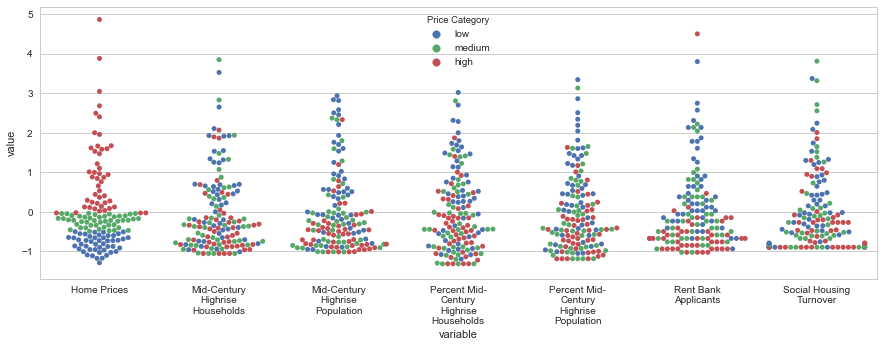

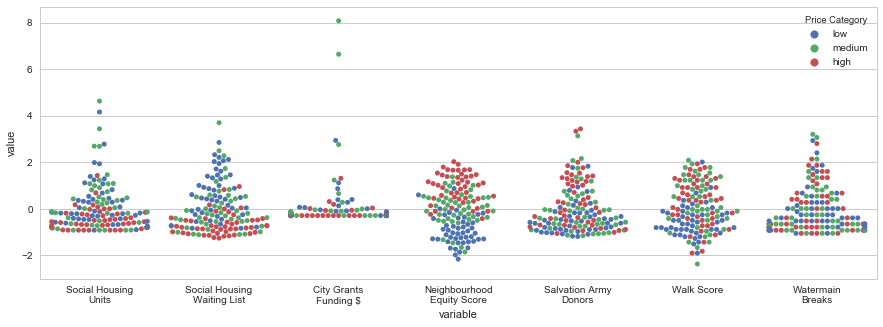

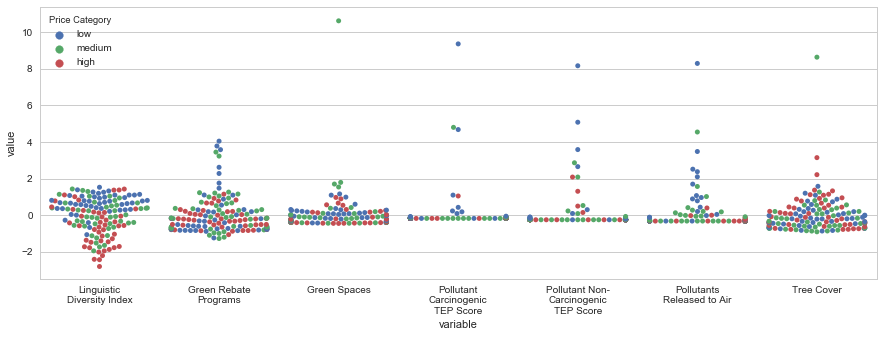

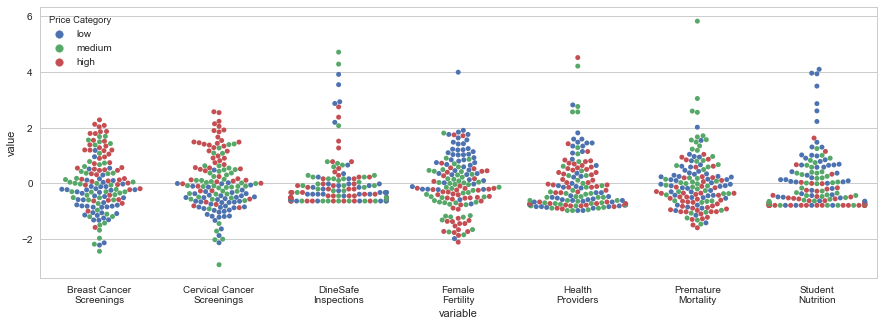

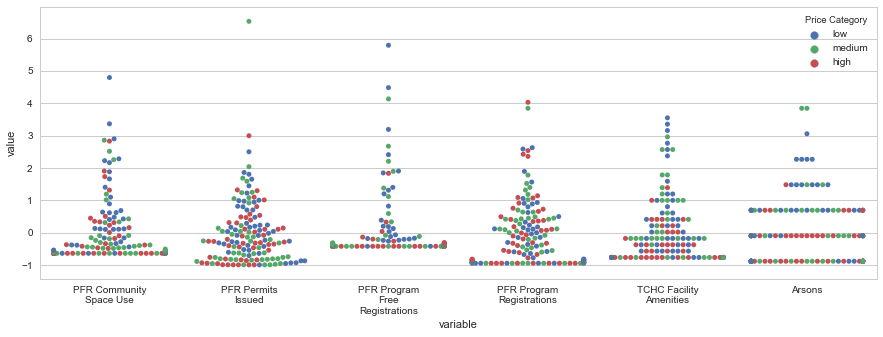

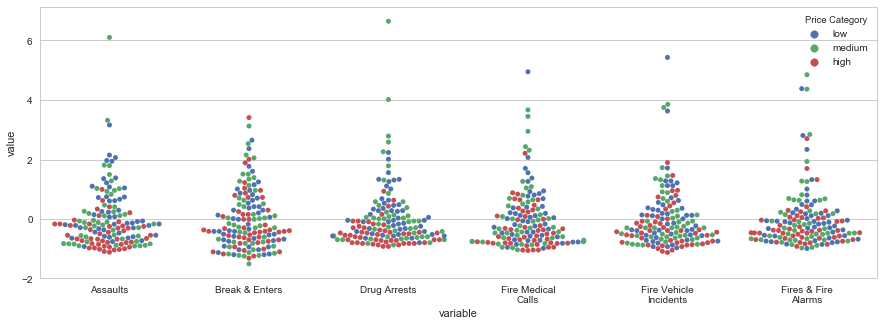

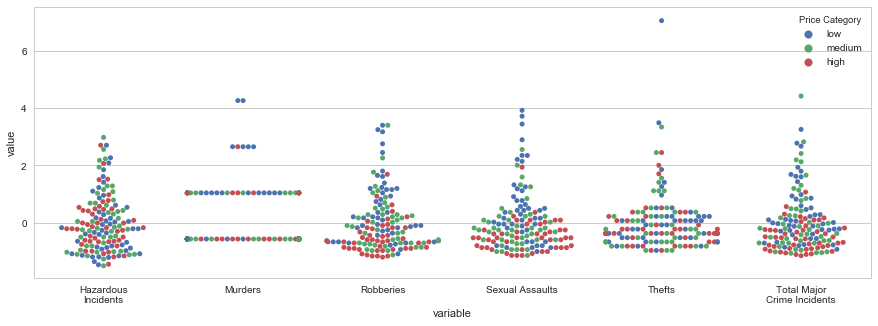

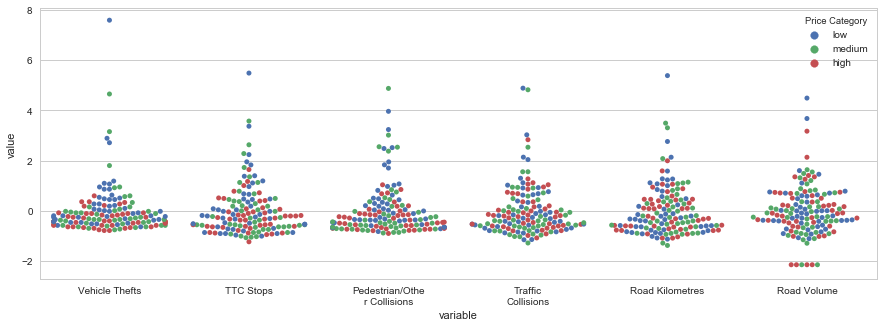

In [64]:
from textwrap import wrap
def plotCategories(df, cols):
    fig, ax = plt.subplots(figsize = (15, 5))
    df_long = pd.melt(df[cols + ['Price Category']], id_vars='Price Category')
    g = sns.swarmplot(x='variable', y='value', hue='Price Category', data=df_long)
    wrapped_labels = [ '\n'.join(wrap(l.get_text(), 15)) for l in g.get_xticklabels() ]
    g.set_xticklabels(wrapped_labels)
for chunk in np.array_split(feature_cols, 8):
    plotCategories(df_norm, list(chunk))

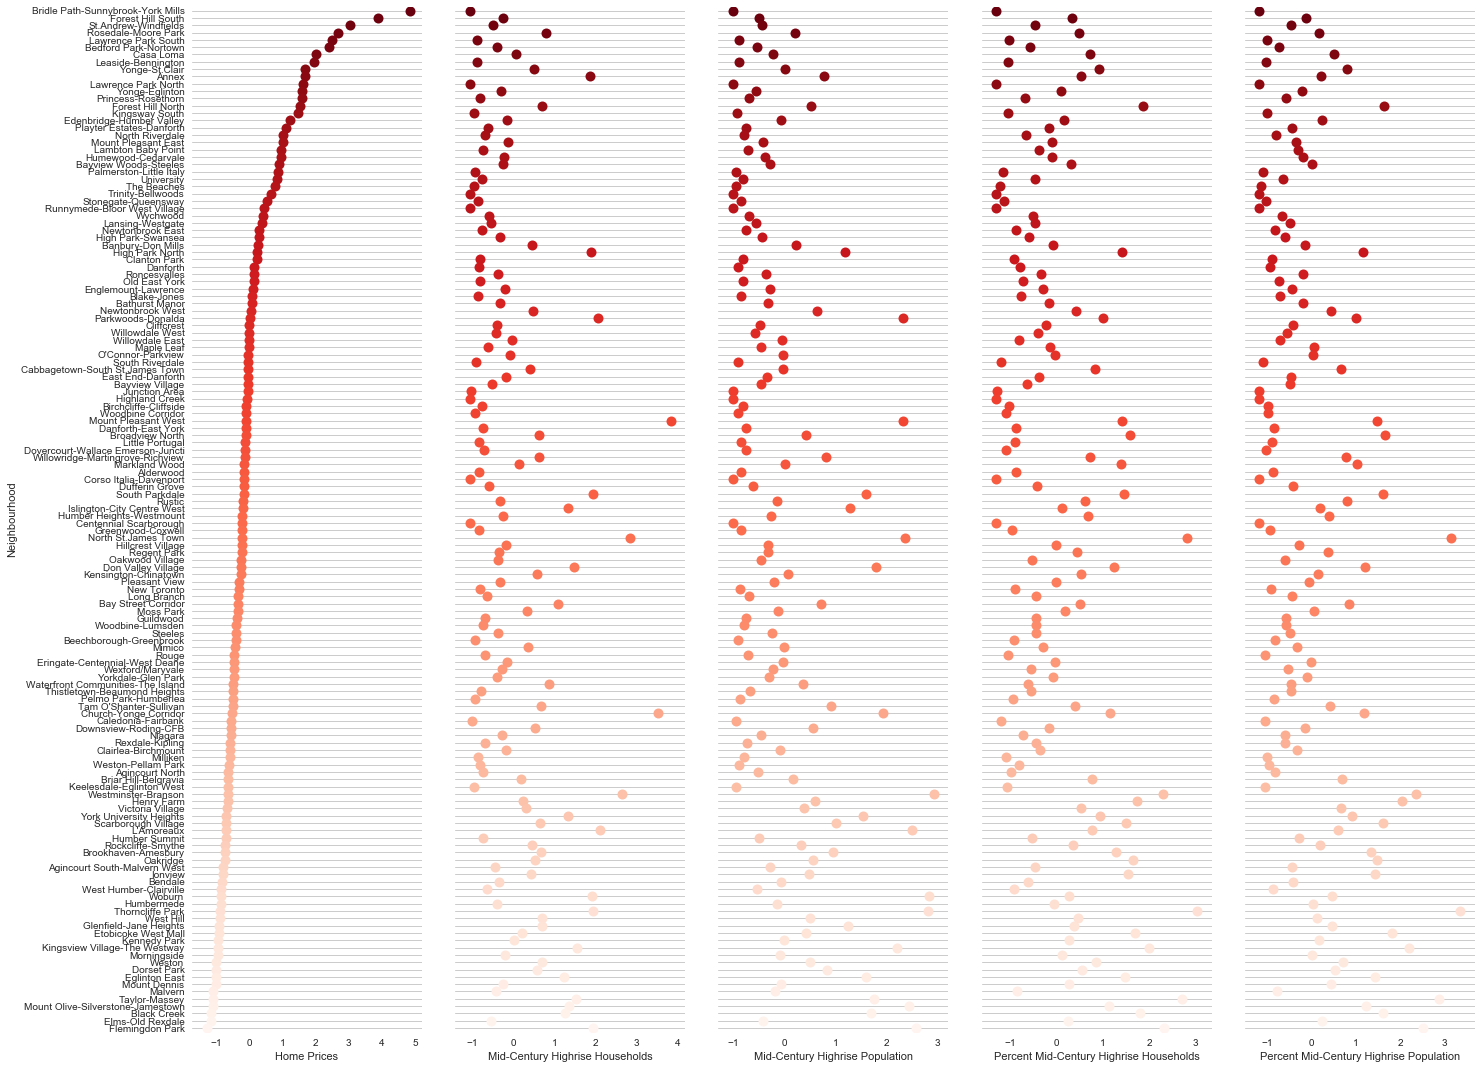

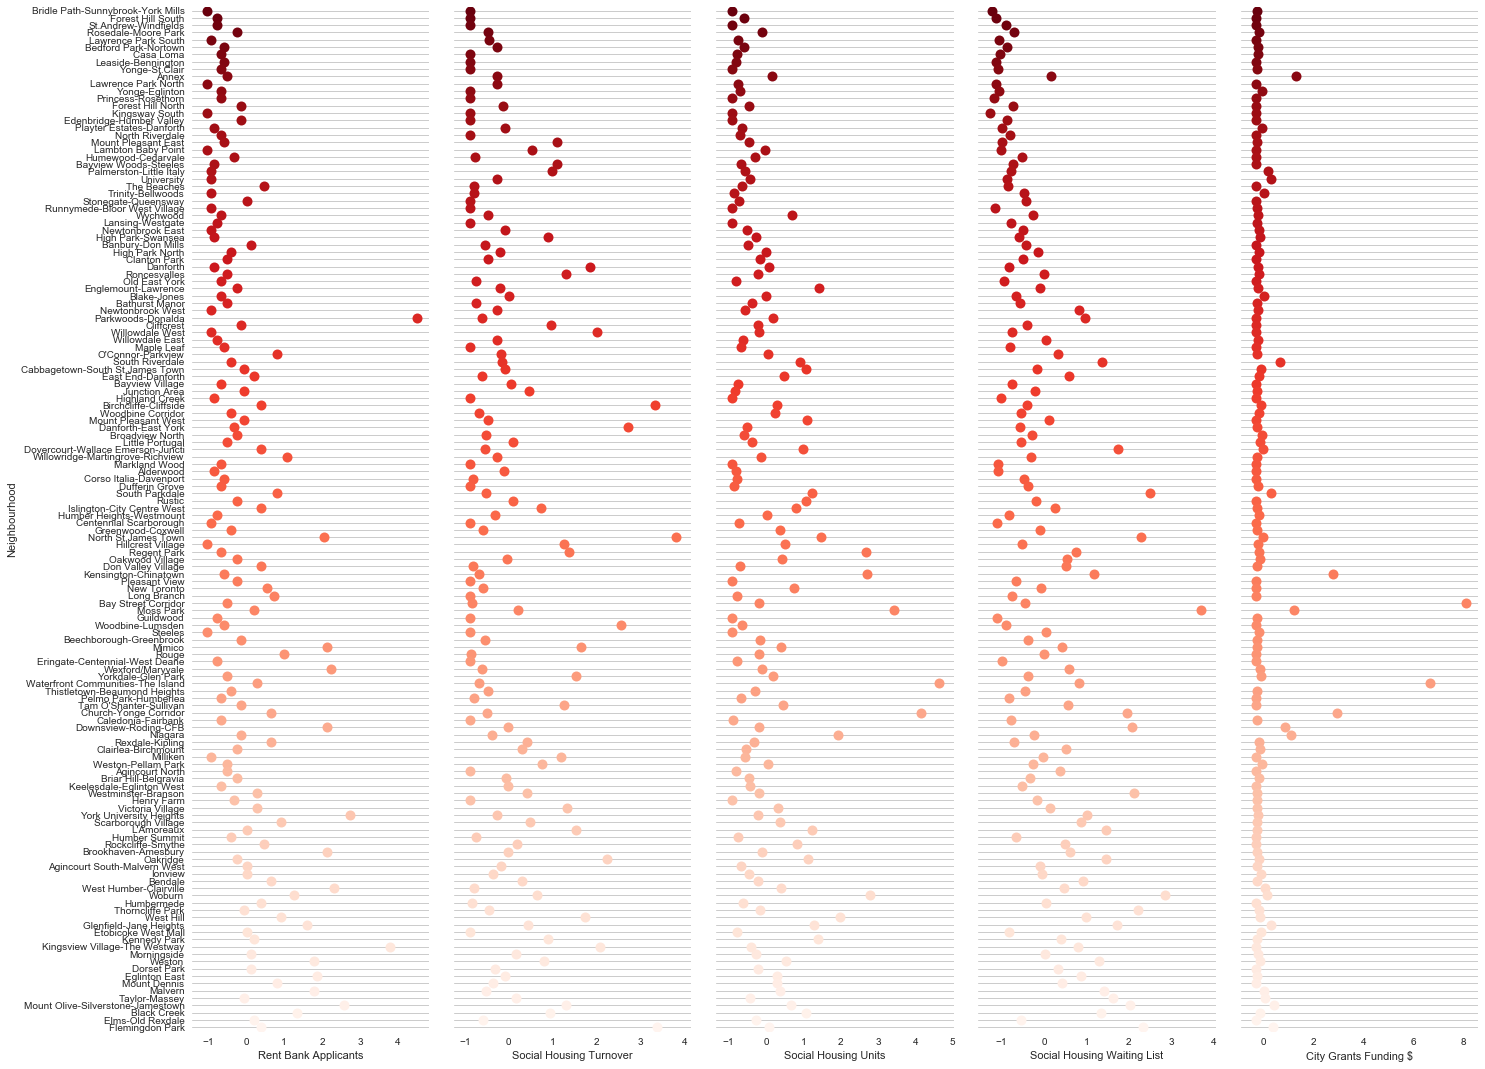

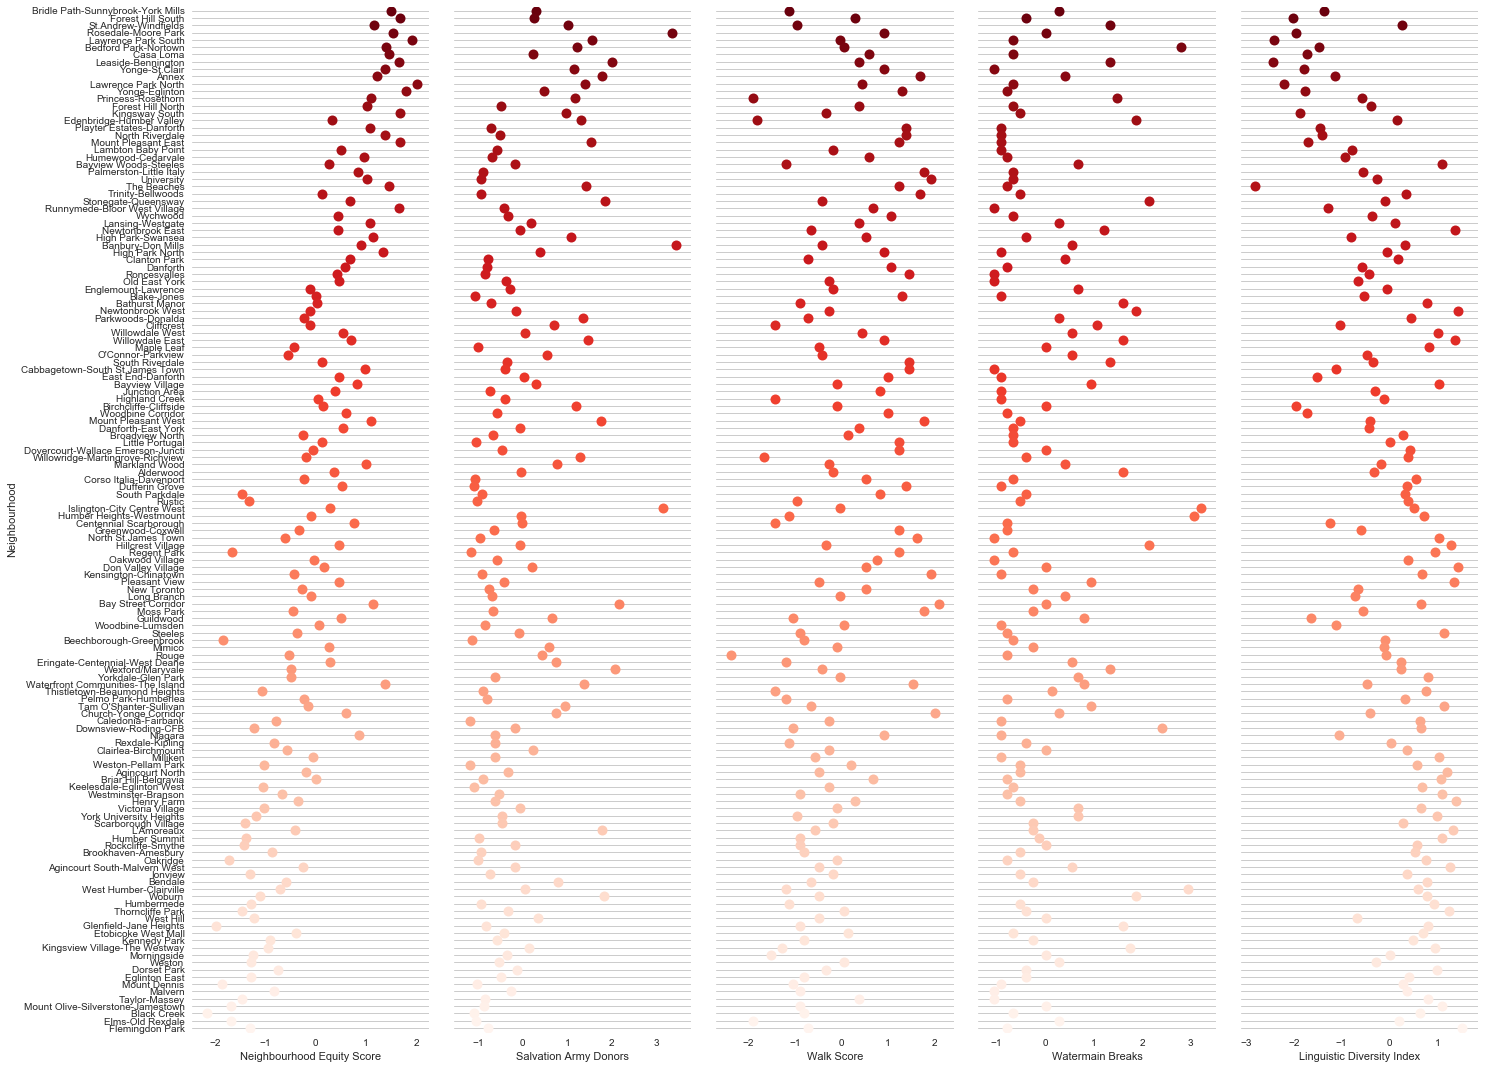

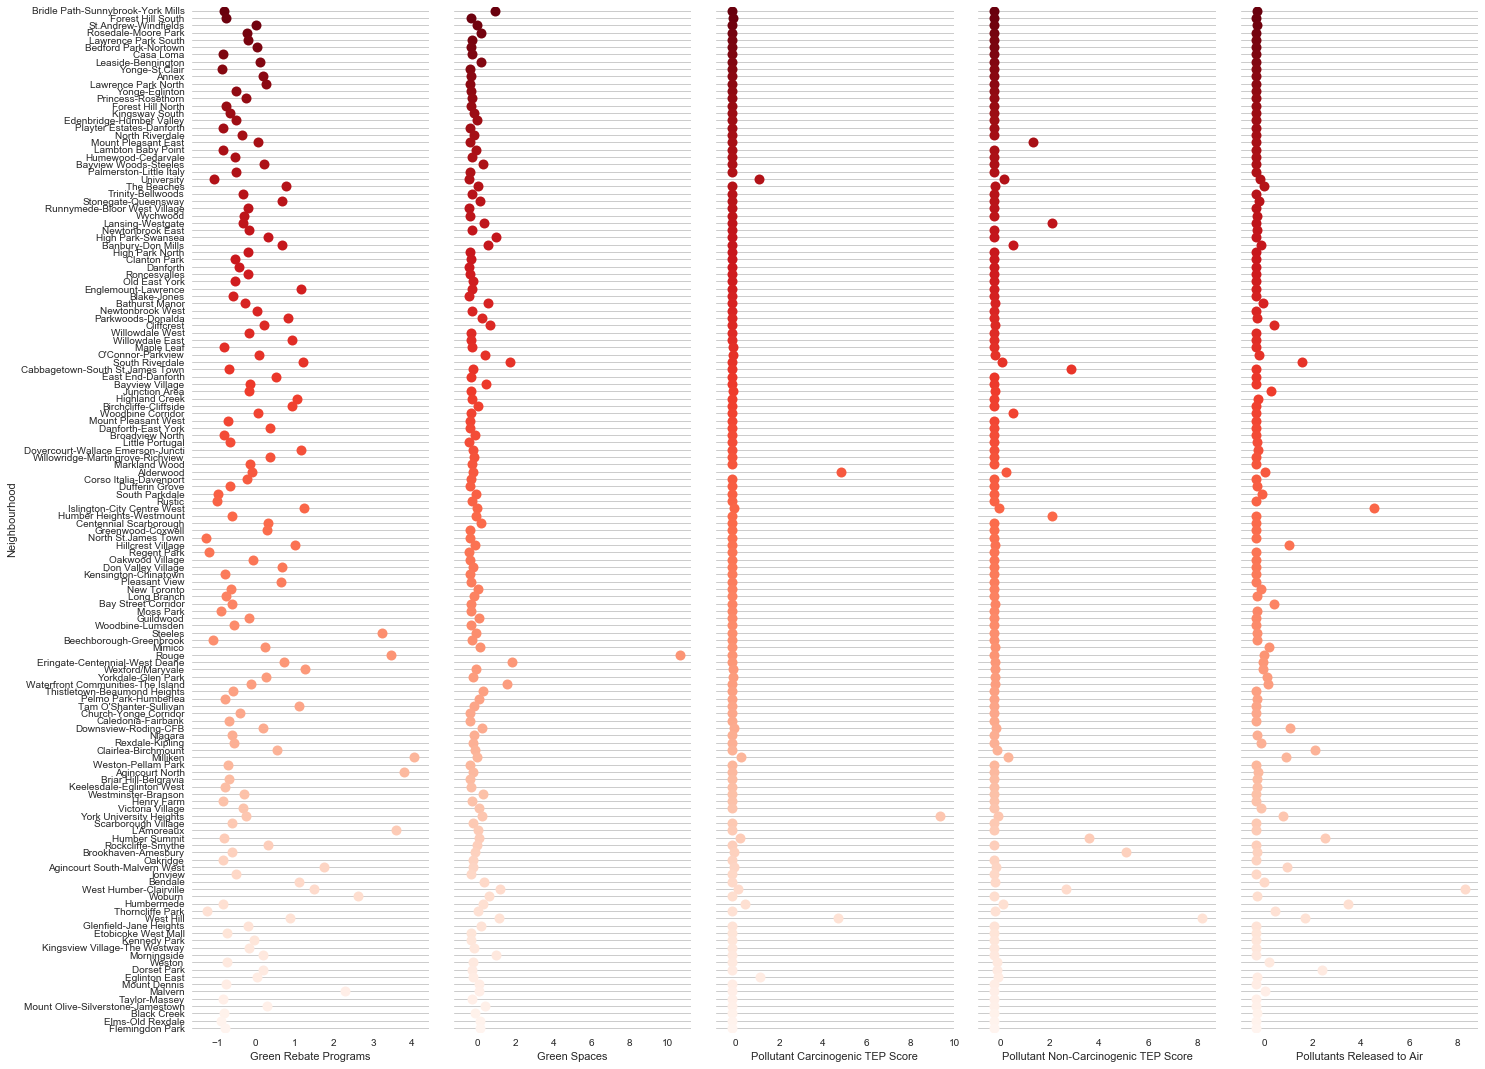

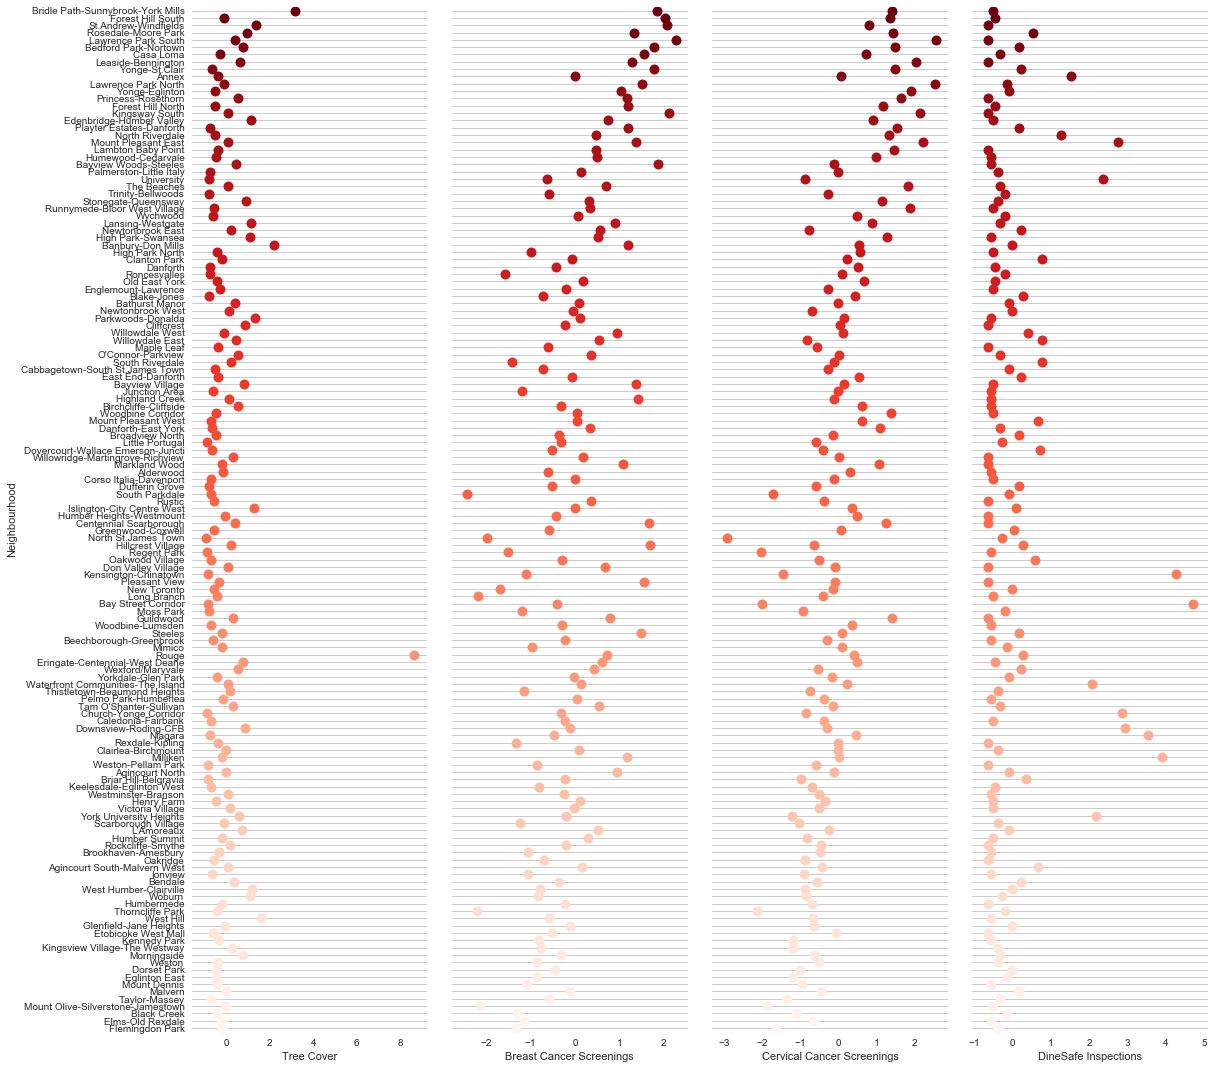

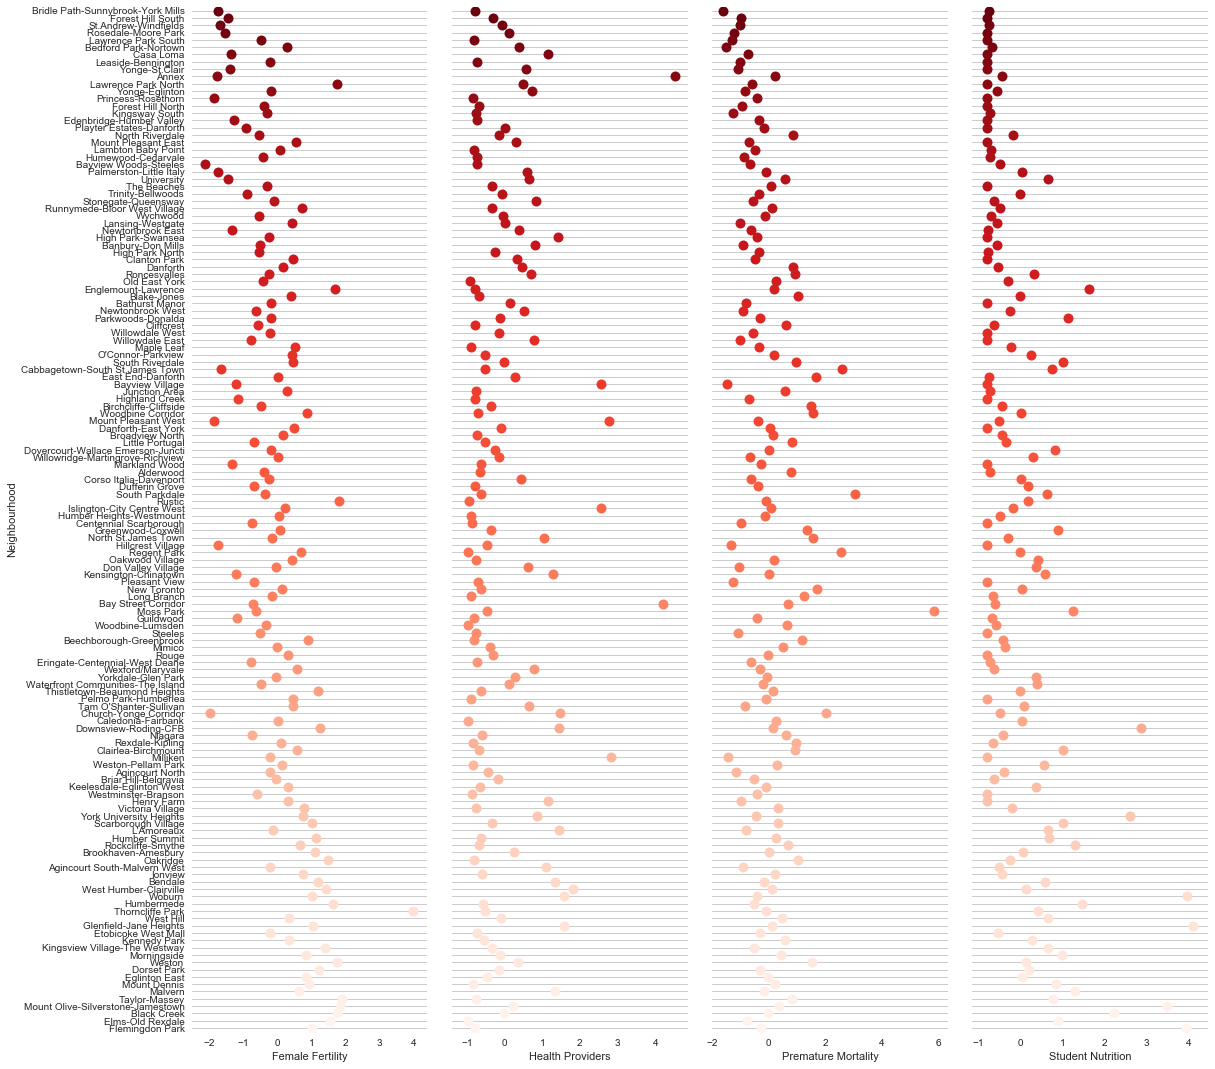

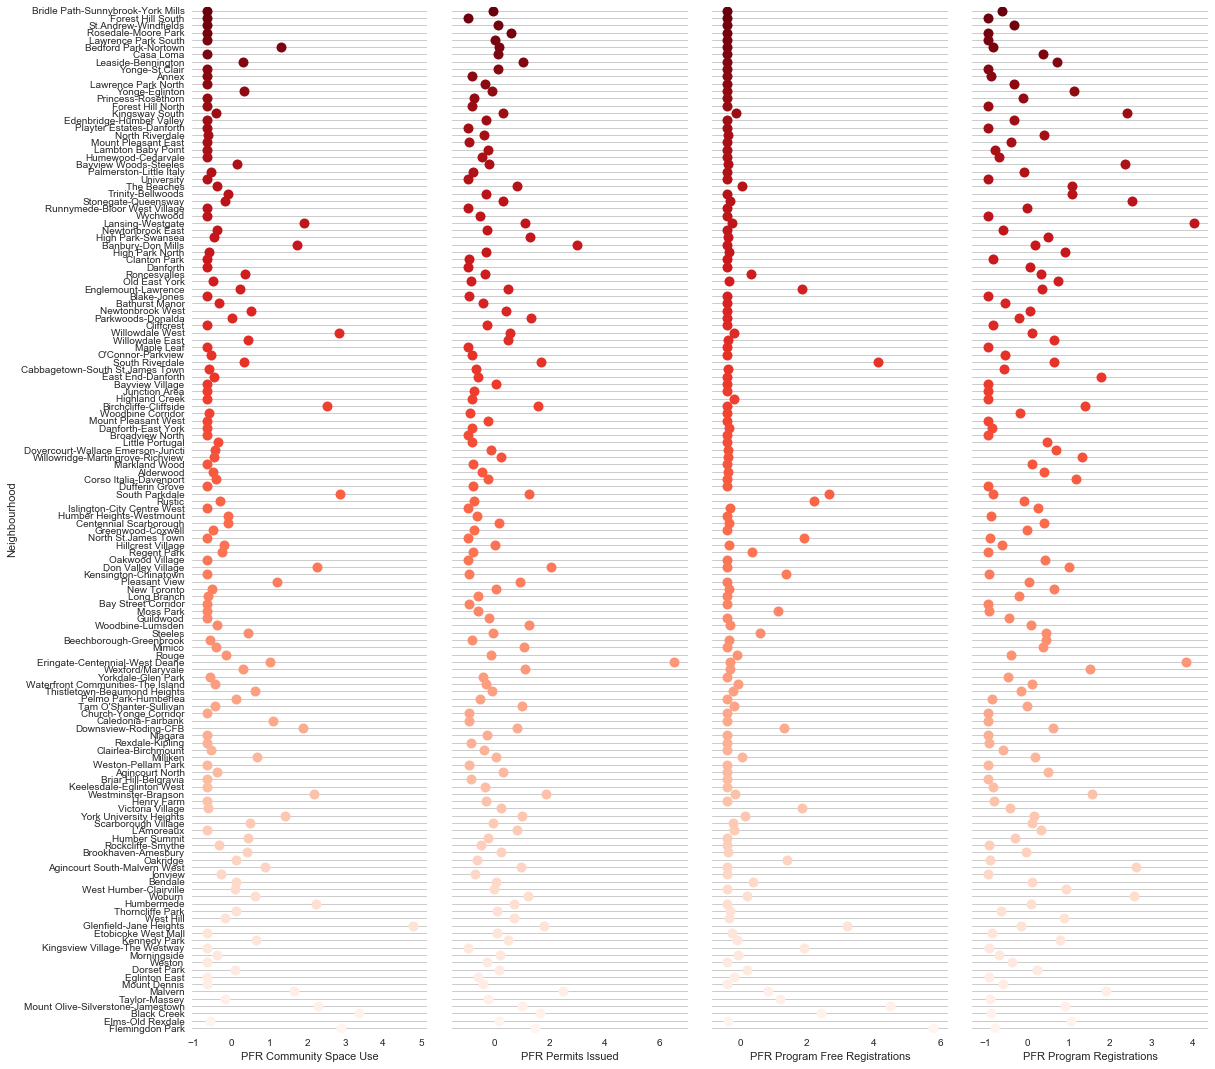

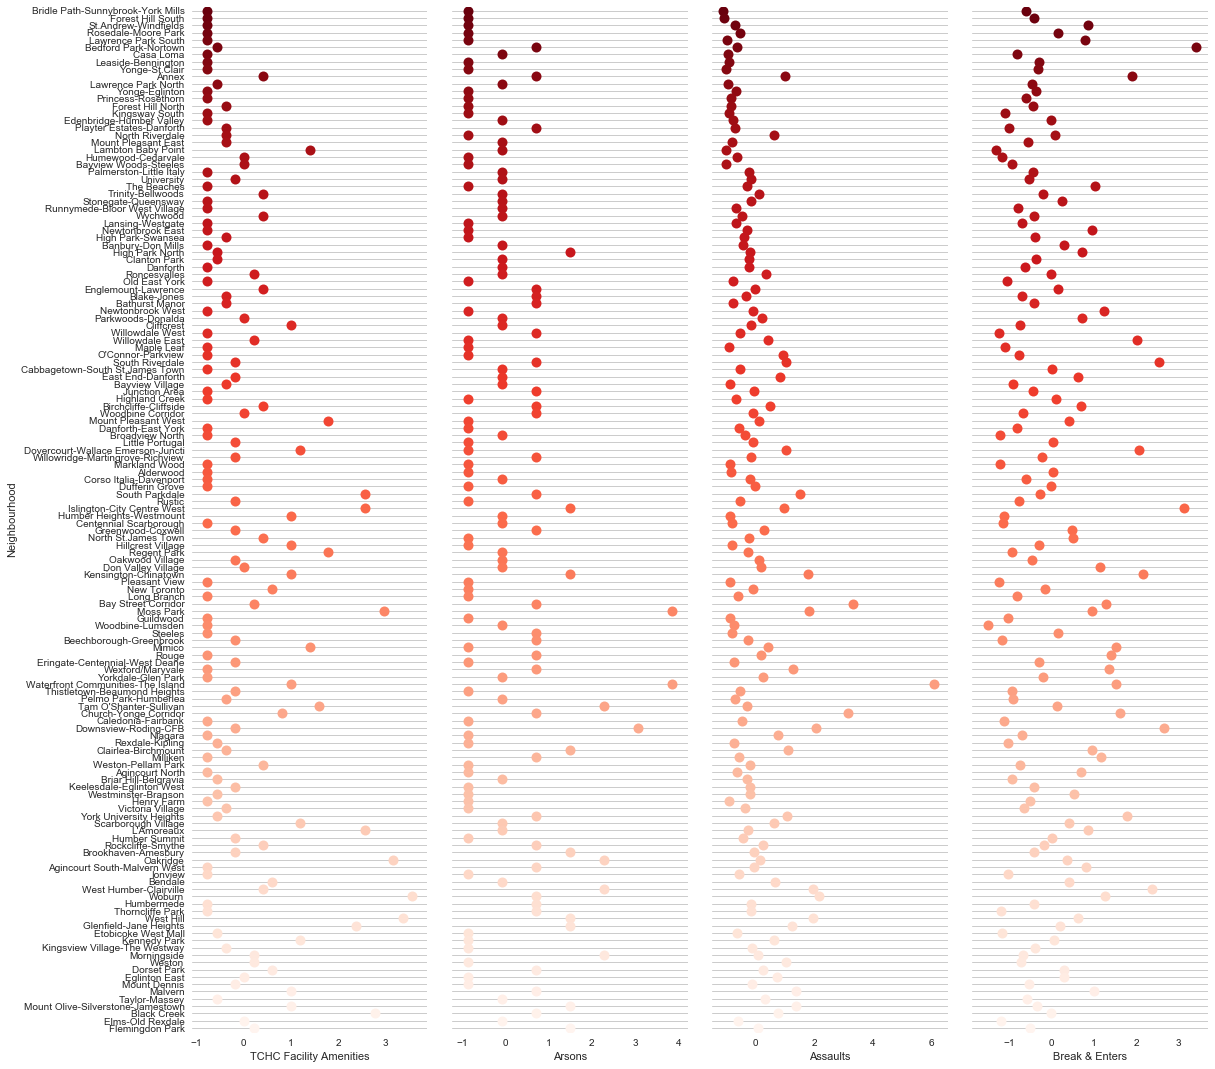

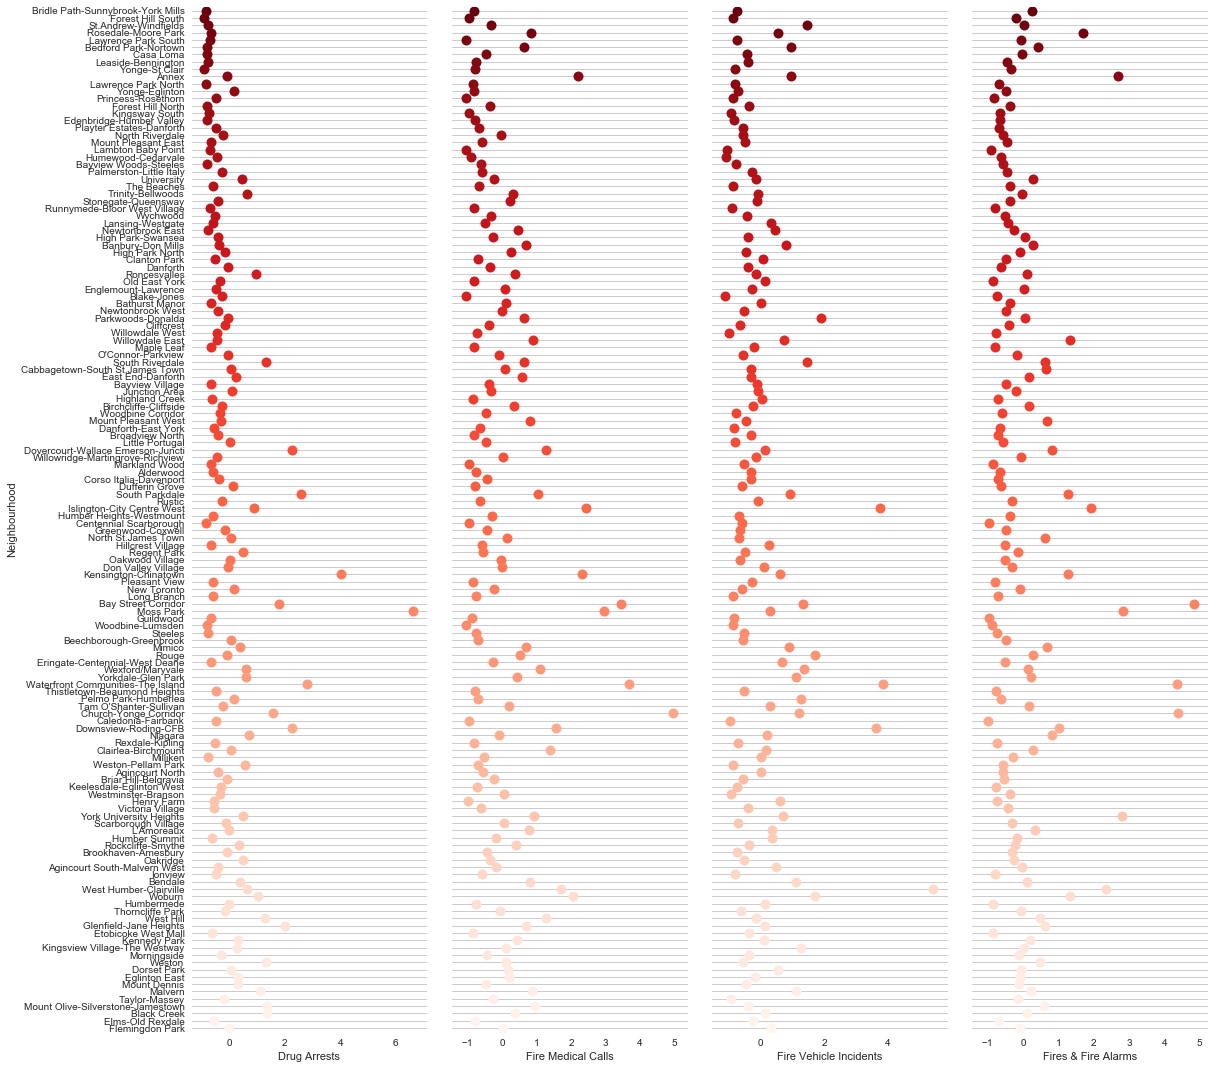

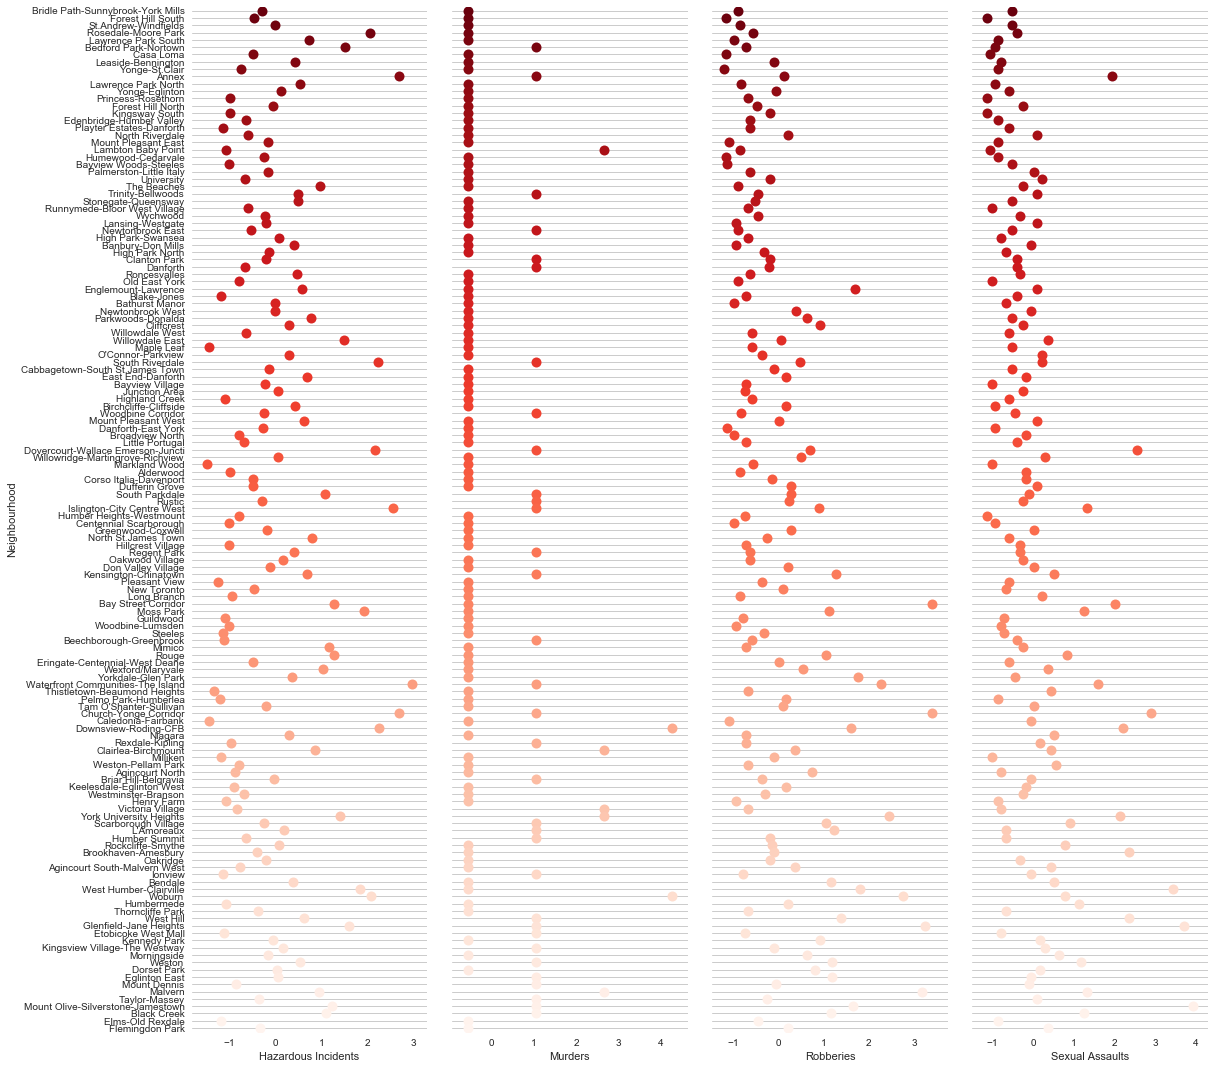

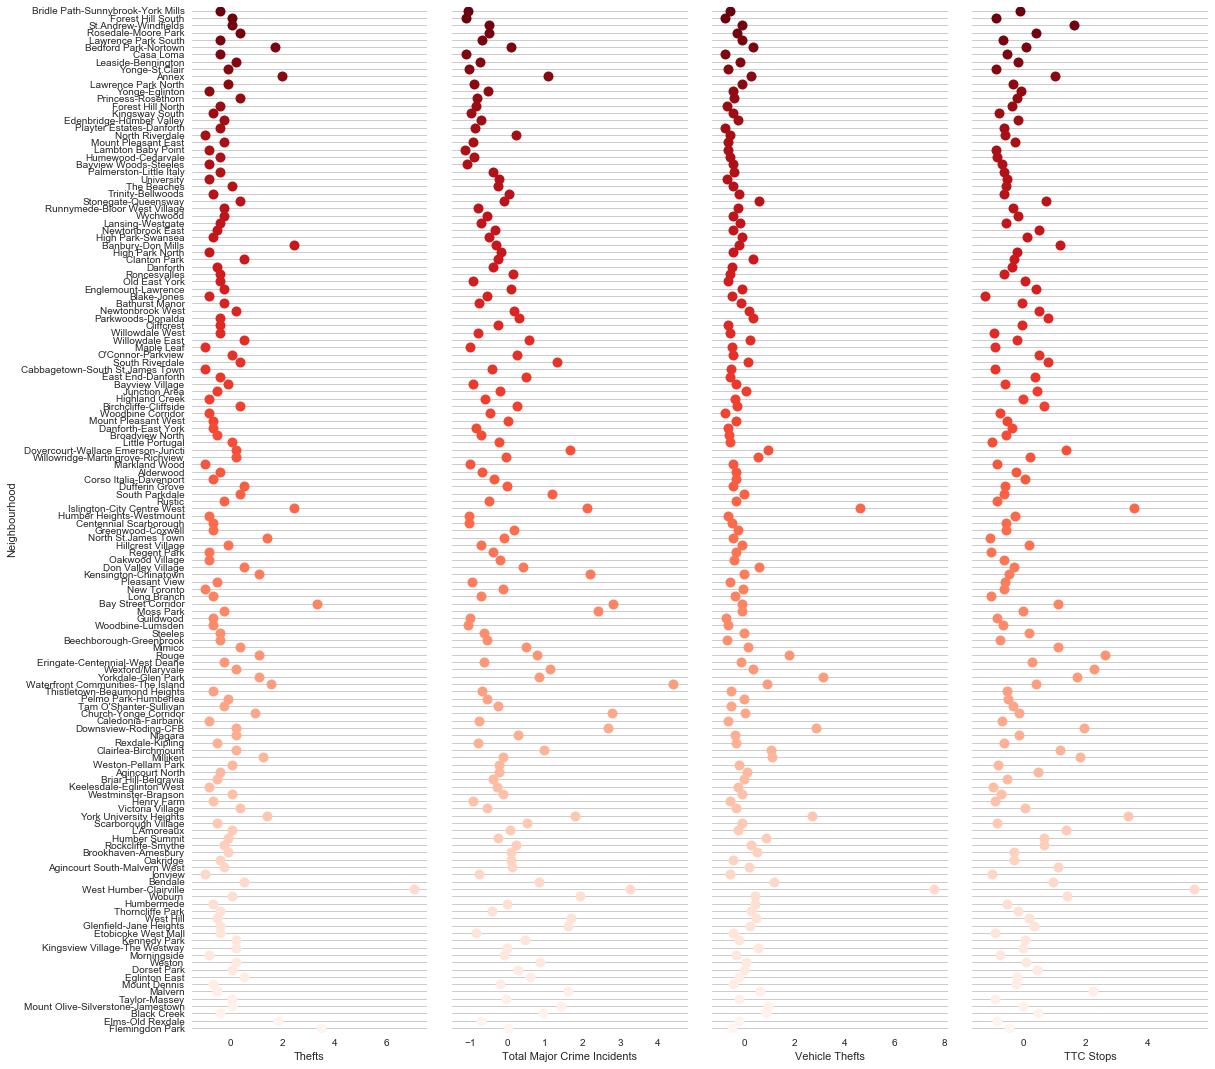

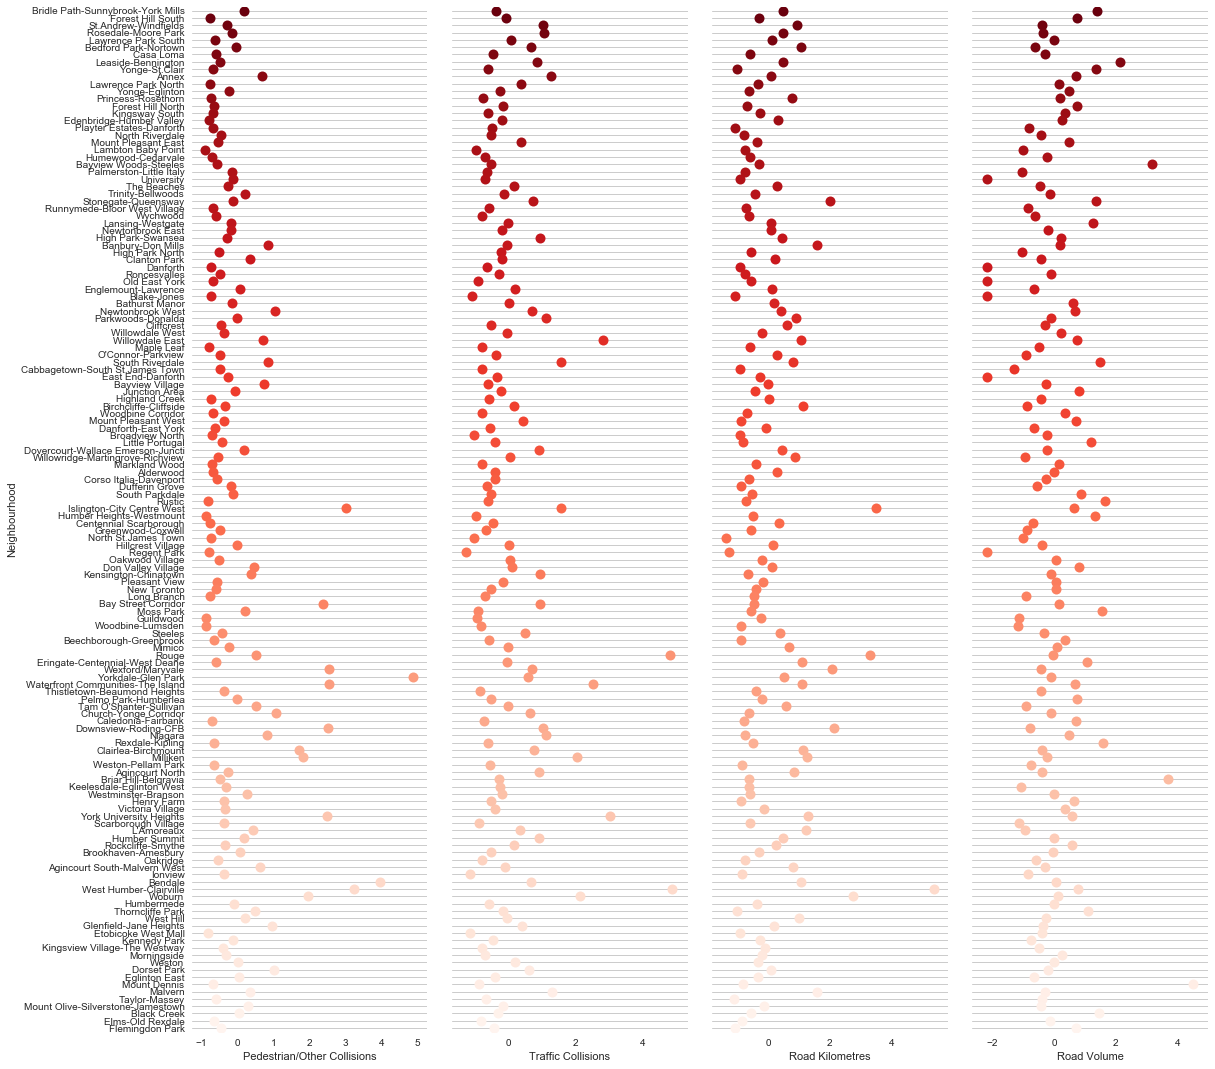

In [70]:
def ranking_plots(df, cols):
    with sns.axes_style("whitegrid"):
        # Load the dataset
        crashes = sns.load_dataset("car_crashes")

        # Make the PairGrid
        g = sns.PairGrid(df.sort_values("Home Prices", ascending=False),
                         x_vars=cols, y_vars=["Neighbourhood"],
                         size=15, aspect=.25)

        # Draw a dot plot using the stripplot function
        g.map(sns.stripplot, size=10, orient="h",
              palette="Reds_r", edgecolor="gray")

        # Use the same x axis limits on all columns and add better labels
        # g.set(xlim=(0, 25), xlabel="Crashes", ylabel="")

        # Use semantically meaningful titles for the columns
#         titles = ["Total crashes", "Speeding crashes", "Alcohol crashes",
#                   "Not distracted crashes", "No previous crashes"]

#         for ax, title in zip(g.axes.flat, titles):
        for ax in g.axes.flat:

            # Set a different title for each axes
#             ax.set(title=title)

            # Make the grid horizontal instead of vertical
            ax.xaxis.grid(False)
            ax.yaxis.grid(True)

        sns.despine(left=True, bottom=True)
        
for chunk in np.array_split(feature_cols, 12):
    ranking_plots(df_norm.reset_index(), list(chunk))
#     break

In [72]:
def identity(x): return x;
def transformAndPlot(df, transforms, x_col='x', y_col='y'):
    fig, axs = plt.subplots(len(transforms), len(transforms), figsize=(17, 17))
    results = {}
    for ax, transform_pair in zip(axs.flatten(), itertools.product(transforms, transforms)):
        x_transform = df[x_col].apply(transform_pair[0])
        y_transform = df[y_col].apply(transform_pair[1])
        x_name = x_col + '_' + transform_pair[0].__name__
        y_name = y_col + '_' + transform_pair[1].__name__
        
        result = sm.OLS(y_transform, sm.add_constant(x_transform)).fit()
        result_text = 'Slope: %.2e\nIntercept: %.2e\nAdj-R2: %.2f' % (result.params['x'], 
                                                                      result.params['const'], 
                                                                      result.rsquared_adj)
        
        results[x_name + ':' + y_name] = result
        ax.plot(x_transform, y_transform, '.')
        ax.plot(x_transform, result.predict(), '-')
        ax.set_xlabel(x_name)
        ax.set_ylabel(y_name)
        ax.text(0.03, 0.82, result_text, transform=ax.transAxes)
    fig.tight_layout()
    return results
def linearRegressionAndResiduals(df, 
                                 x_transform_function=None, y_transform_function=None, 
                                 x_col='x', y_col='y', fit_intercept=True):
    x_transform = df[x_col].apply(x_transform_function) if x_transform_function else df[x_col]
    y_transform = df[y_col].apply(y_transform_function) if y_transform_function else df[y_col]
    if fit_intercept:
        result = sm.OLS(y_transform, sm.add_constant(x_transform)).fit()
    else:
        result = sm.OLS(y_transform, x_transform).fit()
    print(result.summary())
    fig, axs = plt.subplots(nrows=2)
    axs[0].plot(x_transform, y_transform, '.')
    axs[0].plot(x_transform, result.predict(), '-')
    x_name = x_col + '_' + x_transform_function.__name__ if x_transform_function else x_col
    y_name = y_col + '_' + y_transform_function.__name__ if y_transform_function else y_col
    axs[0].set_xlabel(x_name)
    axs[0].set_ylabel(y_name)
    axs[0].set_title('Data and linear fit')
    
    axs[1].plot(x_transform, y_transform - result.predict(), '.')
    axs[1].set_title('Residuals')
    fig.tight_layout()

In [143]:
feature_cols = list(cols[:-1])
feature_cols.remove('Home Prices')

final_result = None

r_sqr_list = []
r_sqr_adj_list = []
while(len(feature_cols) > 0):
    result = sm.OLS(df_norm['Home Prices'], sm.add_constant(df_norm[feature_cols])).fit()
    pvalues = result.pvalues.sort_values(ascending=False)
    drop = pvalues.index[1]
    print("***************")
    print("Number of features: {}".format(len(pvalues)))
    print("Rsquared Adj: {:.2f}".format(result.rsquared_adj))
    print("***************")
    print("Dropping feature '{}' with a p-value of {:.4f}".format(drop, pvalues[1]))
    feature_cols.remove(drop)
    r_sqr_list.append(result.rsquared)
    r_sqr_adj_list.append(result.rsquared_adj)
    if result.rsquared < 0.8: break
    final_result = result

***************
Number of features: 52
Rsquared Adj: 0.80
***************
Dropping feature 'Student Nutrition' with a p-value of 0.9869
***************
Number of features: 51
Rsquared Adj: 0.80
***************
Dropping feature 'Arsons' with a p-value of 0.9593
***************
Number of features: 50
Rsquared Adj: 0.80
***************
Dropping feature 'Murders' with a p-value of 0.9509
***************
Number of features: 49
Rsquared Adj: 0.80
***************
Dropping feature 'Vehicle Thefts' with a p-value of 0.9768
***************
Number of features: 48
Rsquared Adj: 0.81
***************
Dropping feature 'Sexual Assaults' with a p-value of 0.9813
***************
Number of features: 47
Rsquared Adj: 0.81
***************
Dropping feature 'Drug Arrests' with a p-value of 0.9634
***************
Number of features: 46
Rsquared Adj: 0.81
***************
Dropping feature 'Traffic Collisions' with a p-value of 0.9161
***************
Number of features: 45
Rsquared Adj: 0.81
***************
Drop

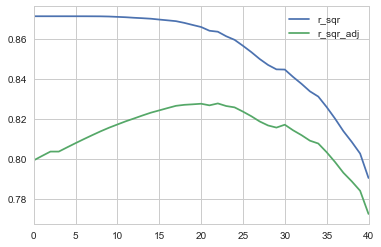

In [141]:
DataFrame({'r_sqr': r_sqr_list, 'r_sqr_adj': r_sqr_adj_list}).plot()

In [142]:
final_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Home Prices   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     43.04
Date:                Wed, 29 Nov 2017   Prob (F-statistic):           6.52e-39
Time:                        21:25:13   Log-Likelihood:                -84.558
No. Observations:                 140   AIC:                             195.1
Df Residuals:                     127   BIC:                             233.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                              1.96e-16      0.039   4.99e-15      1.000      -0.078       0.078
Salvation Army Donors               -0.3284      0.072     -4.531      0.000      -0.472      -0.185
Walk Score                           0.2353      0.060      3.938      0.000       0.117       0.354
Linguistic Diversity Index          -0.4422      0.055     -8.009      0.000      -0.552      -0.333
Green Rebate Programs               -0.2236      0.057     -3.943      0.000      -0.336      -0.111
Green Spaces                        -0.6305      0.106     -5.939      0.000      -0.841      -0.420
Pollutant Carcinogenic TEP Score    -0.1186      0.042     -2.805      0.006      -0.202      -0.035
Tree Cover                           0.8760      0.128      6.851      0.000       0.623       1.129
Breast Cancer Screenings             0.2486      0.068      3.663      0.000       0.114       0.383
Premature Mortality                 -0.1967      0.062     -3.186      0.002      -0.319      -0.075
Break & Enters                       0.2435      0.073      3.335      0.001       0.099       0.388
Fires & Fire Alarms                  0.4010      0.093      4.294      0.000       0.216       0.586
Total Major Crime Incidents         -0.4929      0.101     -4.877      0.000      -0.693      -0.293
==============================================================================
Omnibus:                       10.854   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               14.156
Skew:                           0.462   Prob(JB):                     0.000843
Kurtosis:                       4.255   Cond. No.                         7.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
cols = df_norm.columns.values
cols

array(['Home Prices', 'Mid-Century Highrise Households',
       'Mid-Century Highrise Population',
       'Percent Mid-Century Highrise Households',
       'Percent Mid-Century Highrise Population', 'Rent Bank Applicants',
       'Social Housing Turnover', 'Social Housing Units',
       'Social Housing Waiting List', 'City Grants Funding $',
       'Neighbourhood Equity Score', 'Salvation Army Donors', 'Walk Score',
       'Watermain Breaks', 'Linguistic Diversity Index',
       'Green Rebate Programs', 'Green Spaces',
       'Pollutant Carcinogenic TEP Score',
       'Pollutant Non-Carcinogenic TEP Score',
       'Pollutants Released to Air', 'Tree Cover',
       'Breast Cancer Screenings', 'Cervical Cancer Screenings',
       'DineSafe Inspections', 'Female Fertility', 'Health Providers',
       'Premature Mortality', 'Student Nutrition',
       'PFR Community Space Use', 'PFR Permits Issued',
       'PFR Program Free Registrations', 'PFR Program Registrations',
       'TCHC Facility

                            OLS Regression Results                            
Dep. Variable:            Home Prices   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     8.731
Date:                Tue, 28 Nov 2017   Prob (F-statistic):            0.00368
Time:                        19:35:43   Log-Likelihood:                -193.86
No. Observations:                 140   AIC:                             391.7
Df Residuals:                     138   BIC:                             397.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

/Users/dpyne/anaconda/envs/helpful-analytics/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


                            OLS Regression Results                            
Dep. Variable:            Home Prices   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     114.1
Date:                Tue, 28 Nov 2017   Prob (F-statistic):           8.65e-20
Time:                        19:35:50   Log-Likelihood:                -155.96
No. Observations:                 140   AIC:                             315.9
Df Residuals:                     138   BIC:                             321.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

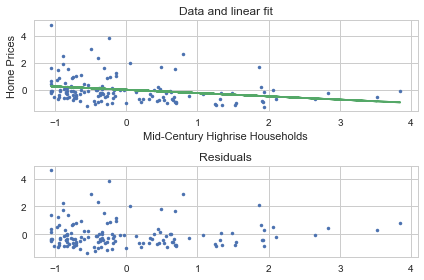

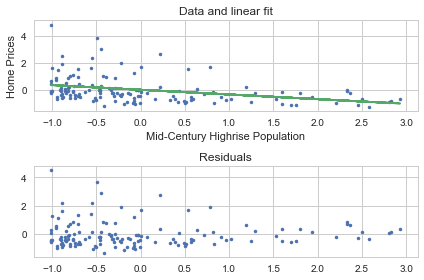

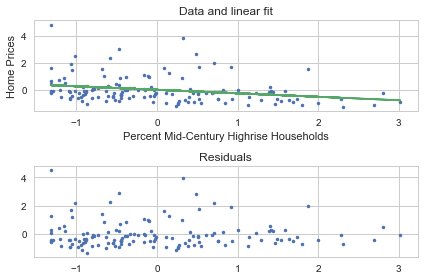

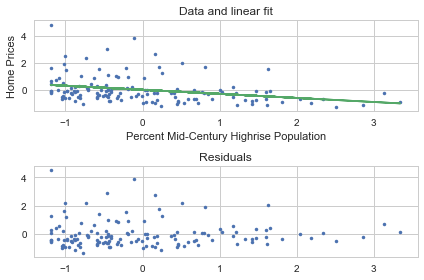

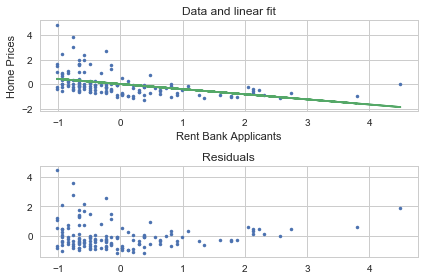

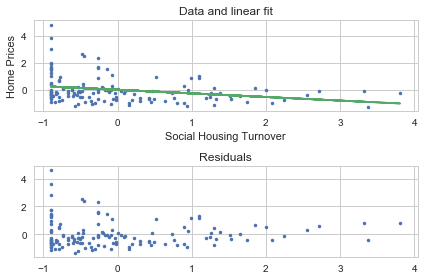

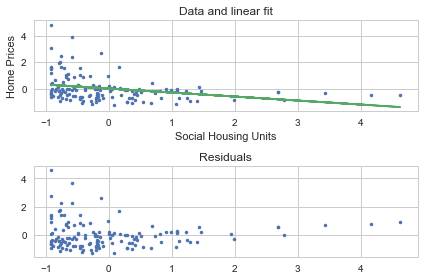

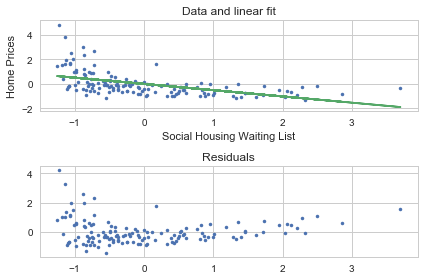

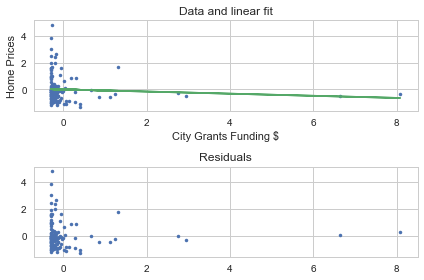

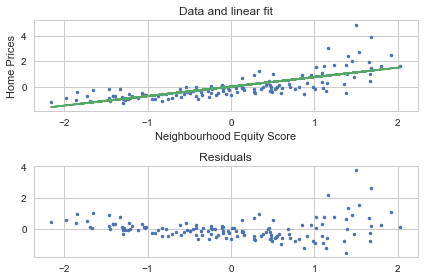

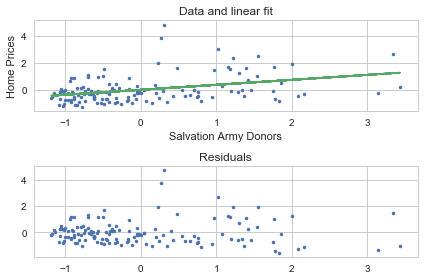

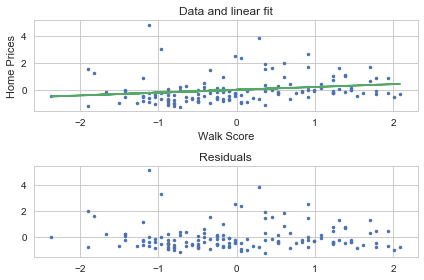

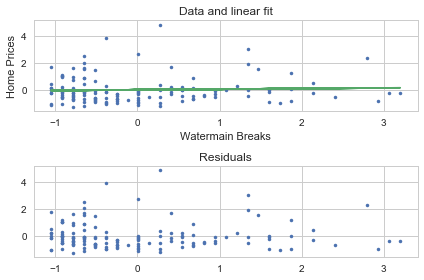

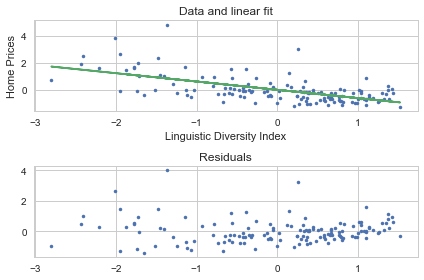

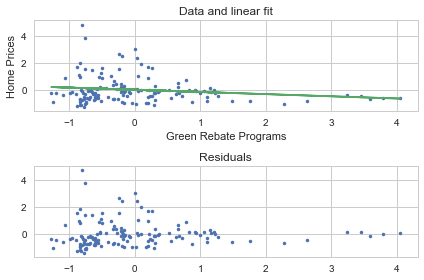

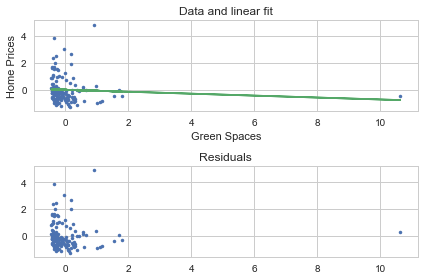

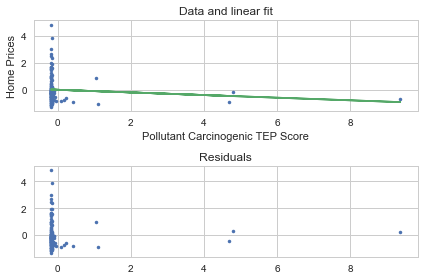

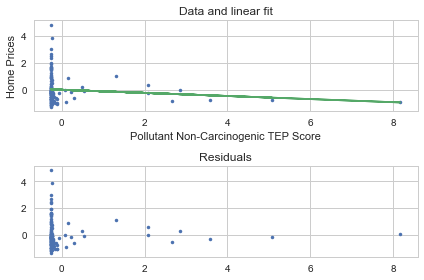

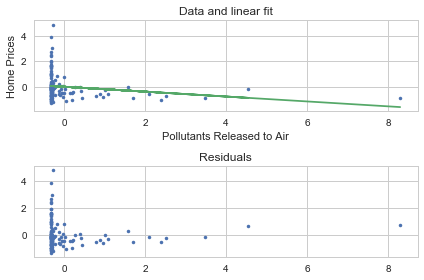

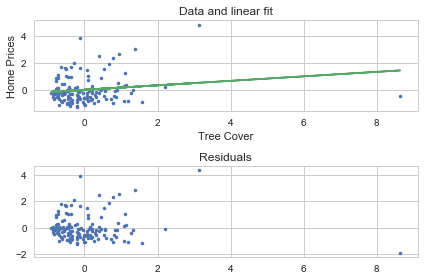

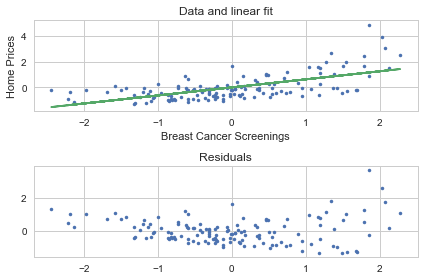

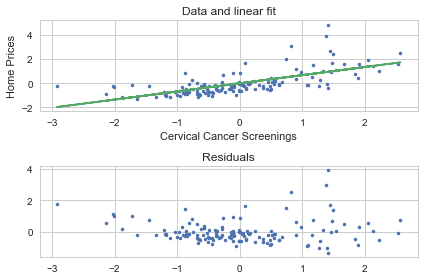

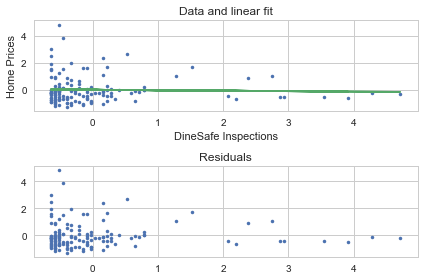

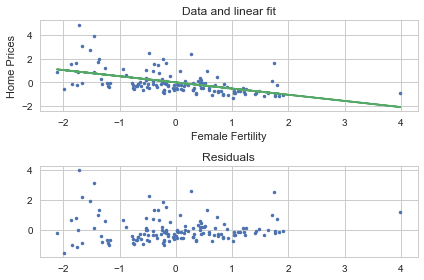

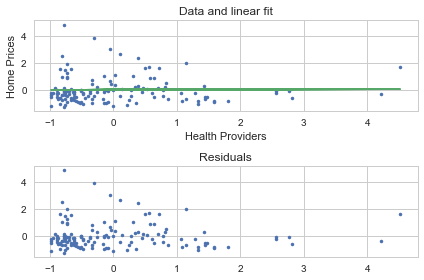

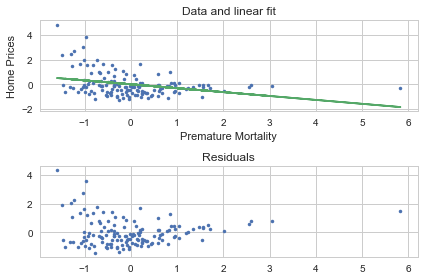

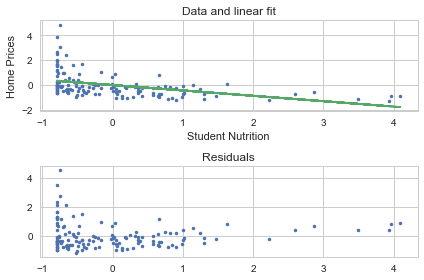

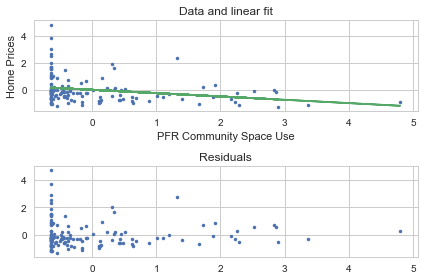

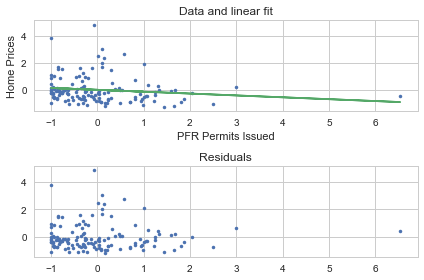

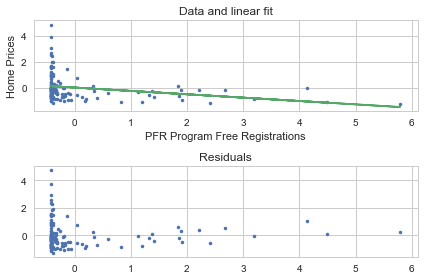

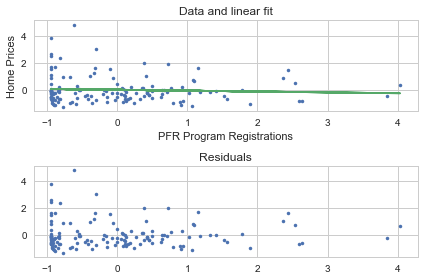

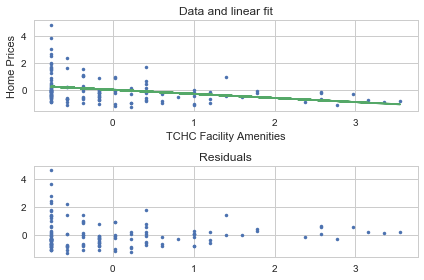

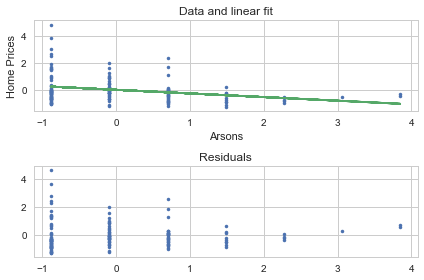

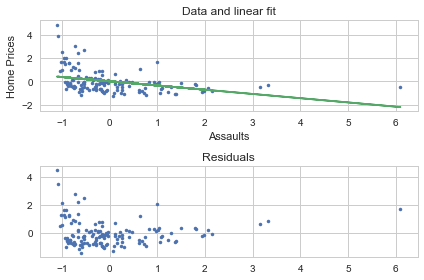

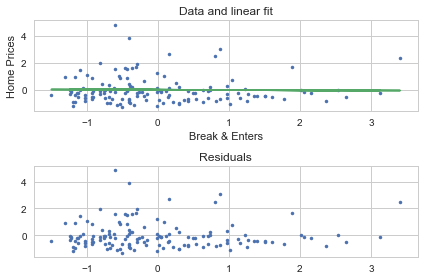

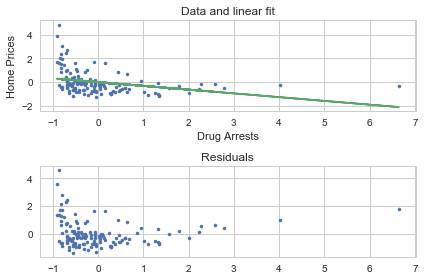

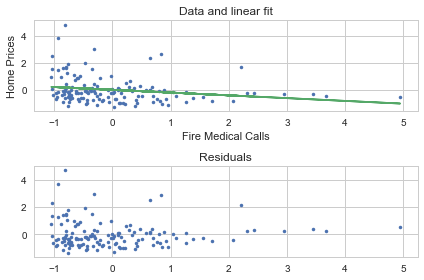

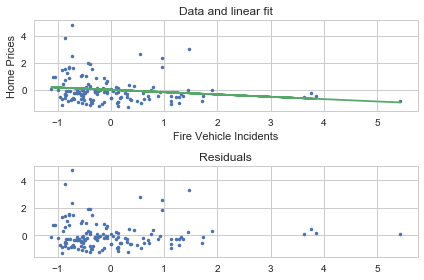

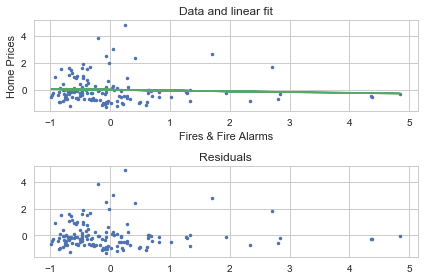

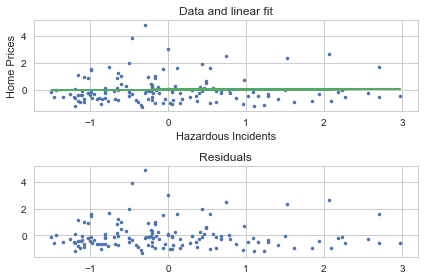

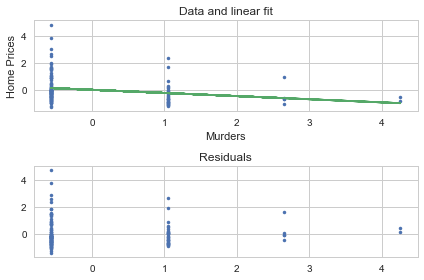

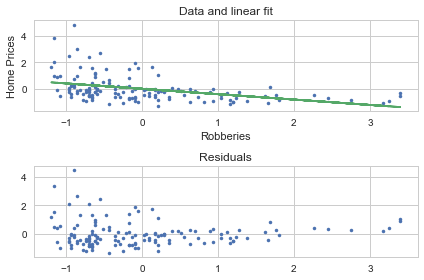

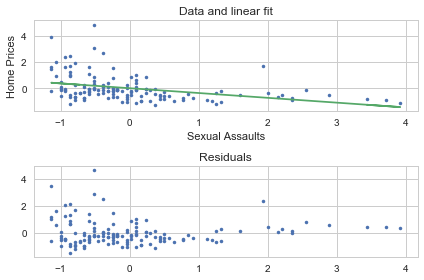

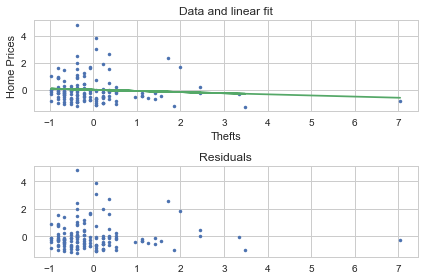

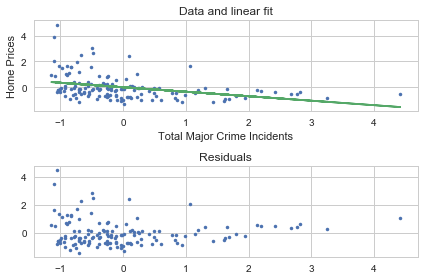

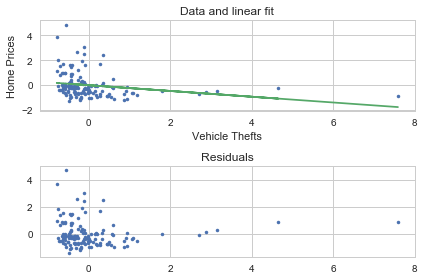

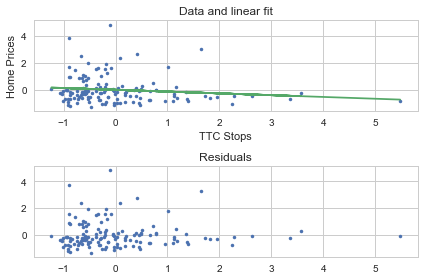

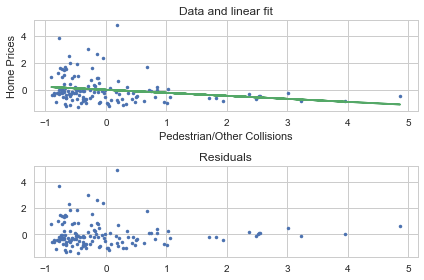

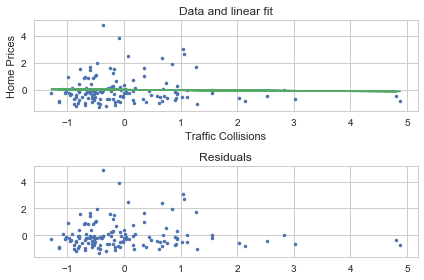

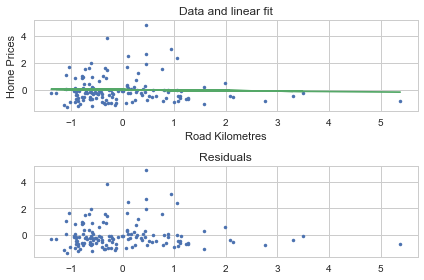

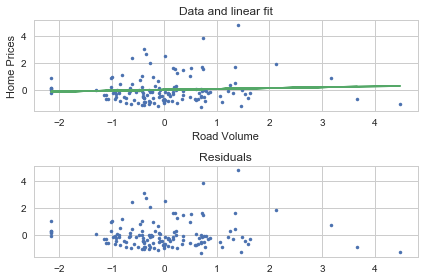

In [83]:
for c in cols[1:]:
    linearRegressionAndResiduals(df_norm, x_col=c, y_col=cols[0])